In [1]:
################## 准备数据 #################
import numpy as np
X = 2*np.random.rand(100,1)
y = 4+3*X + np.random.randn(100,1)

In [2]:
#################step1： 标准方程法 ###############  (X.T * X)^-1 * X.T * y
X_b = np.c_[np.ones((100,1)), X]
theta_estimate = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)),X_new]
y_predict = X_new_b.dot(theta_estimate)
print(theta_estimate)
print(y_predict)

[[3.76259569]
 [3.19363977]]
[[ 3.76259569]
 [10.14987523]]


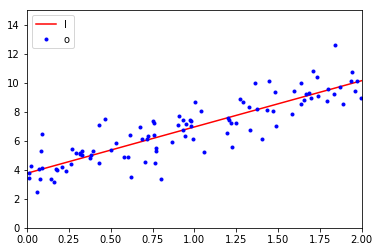

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(X_new, y_predict, 'r-')
plt.plot(X, y, 'b.')
plt.axis([0,2,0,15])
plt.legend('loc')

In [4]:
################### sklearn实现标准方程法  ###################
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)  #注意这里不需要自己手动加bias列
lin_reg.intercept_, lin_reg.coef_

(array([3.76259569]), array([[3.19363977]]))

In [5]:
################## step2:Batch Gradient Descent:   2/m * X.T * (X*θ - y)   #####################
m = 100
theta_path_bgd=[]
lr = 0.1
theta = np.random.randn(2,1)
for iter in range(1000):
    gradients = 2/m * X_b.T .dot(X_b.dot(theta) - y)
    theta = theta - lr * gradients  #theta -= lr * gradients
    theta_path_bgd.append(theta)
print(theta)

[[3.76259569]
 [3.19363977]]


In [6]:
################## step3: Stochastic GD ####################
################## 特点： 每次只使用一个随机选取的instance 进行训练 ####################
################## 注意： 必须使用lr-decay #################
num_epochs = 100
t0, t1 = 5, 50
theta = np.random.randn(2,1)
theta_path_sgd=[]
def learning_schedule(t):  #注意这种learning rate decay 的方法
    return t0 / (t1 + t)
for epoch in range(num_epochs):
    for i in range(m):
        index = np.random.randint(m)
#         xi = X_b[index,:] 错误写法，这样返回的是一个向量，不是矩阵，所以转置之后仍是向量
        xi = X_b[index:index+1]
        yi = y[index]
        gradient = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradient  ##theta -=  eta * gradient 错了，造成下面的问题
        theta_path_sgd.append(theta)  ###问题：为什么theta_path_sgd中的值没变化，都等于最后的值？ 
print(theta)

[[3.73916503]
 [3.21537896]]


In [7]:
num_epochs = 50
batch_size = 20
theta_path_mgd = []
theta = np.random.randn(2,1)
t0, t1 = 200,1000
t = 0
def learning_schedule(t):
    return t0/(t1+t)

for epoch in range(num_epochs):
    shuffle_indices = np.random.permutation(len(X))  #注意：①shuffle在每个epoch开始时进行
    X_shuffled = X_b[shuffle_indices]                 # 注意： ② 可以使用np.random.choice(len(X), batch_size, replace =False)
    y_shuffled = y[shuffle_indices]
    for i in range(0, m, batch_size):
        t=t+1                              #注意：每次迭代就减小一次lr
        X_batch = X_shuffled[i:i+batch_size]
        y_batch = y_shuffled[i:i+batch_size]
        gradient = 2/batch_size * X_batch.T.dot(X_batch.dot(theta) - y_batch)  #注意：这里m= batch_size
        theta = theta - learning_schedule(t) * gradient  #？？？？？？？ 为什么写成theta -= eta*gradients ，theta_path_mgd就一样了？？？？
        theta_path_mgd.append(theta)
print(theta)

[[3.77117818]
 [3.2299242 ]]


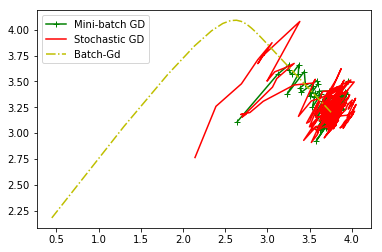

In [8]:
#### 注意：为了绘制 theta_path_mgd 逐渐变化的曲线，需要先将list转为array(list无法使用theta_path_mgd[:,1])
theta_path_mgd=np.array(theta_path_mgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_bgd = np.array(theta_path_bgd)
plt.plot(theta_path_mgd[:,0],theta_path_mgd[:,1], 'g-+', label = 'Mini-batch GD')
plt.plot(theta_path_sgd[:,0],theta_path_sgd[:,1], 'r-', label = 'Stochastic GD')
plt.plot(theta_path_bgd[:,0],theta_path_bgd[:,1], 'y-.', label = 'Batch-Gd')
plt.legend(loc = 'upper left', fontsize = 10)
plt.savefig(filename = '收敛情况.png',format='png', dpi=300)

In [9]:
  #########################  多项式回归: use linear model to fit nonlinear data ##########################
## 一个简单的方法：在原来的feature上加上其平方项作为新的feature，在训练线性回归模型

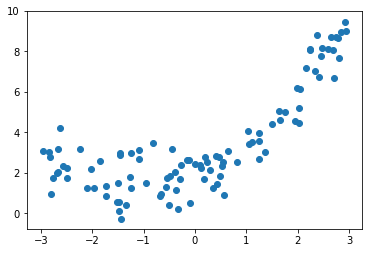

In [10]:
############  step 1: ################
m = 100
X = 6* np.random.rand(m,1) - 3
y = 0.5 * X ** 2 +X + 2 + np.random.randn(m, 1)
plt.scatter(X,y)

In [11]:
X_non = np.c_[X, X**2] #另一种直观的写法

In [12]:
# 使用PolynomialFeatures 来创建新feature —— 注意 degree 参数很重要
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree = 2, include_bias = False)
X_poly = poly_features.fit_transform(X)
print(X_poly[:5] ==  X_non[:5])

[[ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]]


In [13]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.90717459]), array([[1.04036521, 0.48022249]]))

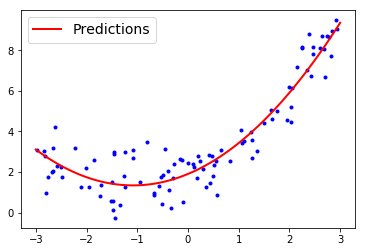

In [14]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.legend(loc = 'upper left',fontsize = 14)

In [15]:
##################  step2：绘制 learning curve ###################
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
# train_error_hisotry = []
# val_error_history = [] #注意：两个列表的初始化如果不放在循环里，调用过一次函数之后，列表的值就定下来了，再次调用函数将不会更新！！！
def plot_learning_curve(model, X, y):
    train_error_hisotry = []
    val_error_history = [] 
    x_train, x_val, y_train, y_val = train_test_split(X, y,test_size = 0.2)
    for i in range(1, m):
        model.fit(x_train[:i], y_train[:i])
        pred_train = model.predict(x_train[:i]) #注意：只能预测到训练截止处
        pred_val = model.predict(x_val)
        train_error = mean_squared_error(pred_train, y_train[:i])
        val_error = mean_squared_error(pred_val, y_val)
        train_error_hisotry.append(train_error)
        val_error_history.append(val_error)
    plt.plot(np.sqrt(train_error_hisotry), 'r-+', linewidth = 2, label = 'train')
    plt.plot(np.sqrt(val_error_history), 'g-.', linewidth =3, label = 'validation')
    plt.legend(loc='upper right',fontsize = 14)


[0, 100, 0, 3]

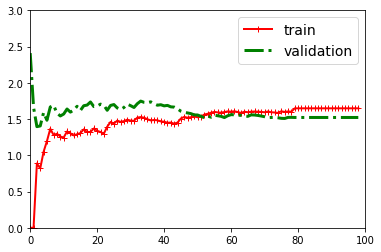

In [16]:
plot_learning_curve(lin_reg, X, y) #若使用线性模型来拟合非线性数据，出现严重的欠拟合，即bias较大，variance较小（注意看训练误差，稳定后较高）
plt.axis([0, 100, 0, 3])           # not shown



[0, 100, 0, 3]

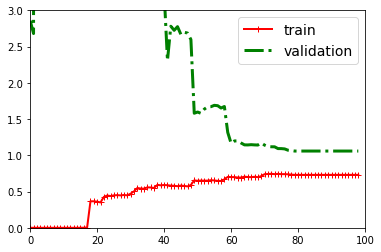

In [17]:
from sklearn.pipeline import Pipeline
polynomial_regressor = Pipeline([   #小-中-小
    ('poly_feature', PolynomialFeatures(degree = 20, include_bias=False)), ## degree=20 加入了20次方项
    ('sgd_reg',LinearRegression())
])
# polynomial_regression = Pipeline([
#         ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
#         ("lin_reg", LinearRegression()),
#     ])
plot_learning_curve(polynomial_regressor, X, y)
plt.axis([0, 100, 0, 3])           # not shown
# 训练误差稳定后较低，但是和实际validation误差相差较大

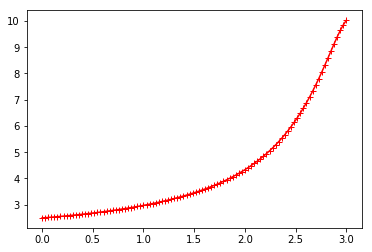

In [18]:
######################## 第三步： 加入regularization ############################
######################## 注意：使用所有的reguralization之前都需要scale data ################
########################  ① Rigid regularization： 即l2约束，可以使用标准方程或者GD #######################
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
X_new = np.linspace(0, 3, 100).reshape(100, 1)

rgd_model = Pipeline([
    ('poly_feature',PolynomialFeatures(degree = 30, include_bias=False)),
    ('std_scale',StandardScaler()),
    ('Regid_regularization', Ridge(alpha=100, solver='cholesky'))
])
rgd_model.fit(X, y)
y_new_regul = rgd_model.predict(X_new)
plt.plot(X_new, y_new_regul,'r+-')


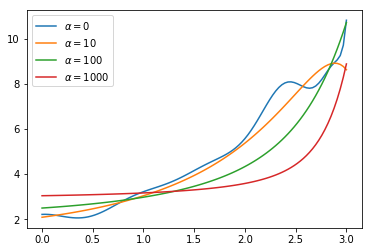

In [19]:
def plot_model(model_class, alphas, **model_kargs):
    for alpha, style in zip(alphas, ["b-", "g--", "r:" ,'y++']): #注意zip 是同时取两个列表的同一个索引
        model = model_class(alpha, **model_kargs) if alpha>0 else LinearRegression()   ######注意这里的判断条件
        model_reg = Pipeline([
            ('polynomial', PolynomialFeatures(degree=20, include_bias=False)),
            ('std_saler', StandardScaler()),
            ('model',model)
        ])
        model_reg.fit(X, y)
        y_new_regul = model_reg.predict(X_new)
        plt.plot(X_new, y_new_regul, label = r'$\alpha = {}$'.format(alpha))
        plt.legend(loc = 'upper left')
                 
alphas = [0, 10,100, 1000] # reguralization 越大，曲线越趋近于水平线
plot_model(Ridge, alphas, solver = 'cholesky')

In [20]:
alphas = [0, 10, 100]
line_style = ["b-", "g--", "r:"]
for alpha, sy in zip(alphas, line_style):
    print(alpha, sy)


0 b-
10 g--
100 r:
